# Heart Attack Dataset Analysis

### Feature Desc.
* Age : Age of the patient

* Sex : Sex of the patient

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type chest pain type
> * Value 1: typical angina
> * Value 2: atypical angina
> * Value 3: non-anginal pain
> * Value 4: asymptomatic

* trtbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* rest_ecg : resting electrocardiographic results
> * Value 0: normal
> * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
> * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* thalach : maximum heart rate achieved

* target : 0= less chance of heart attack 1= more chance of heart attack



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

heart = pd.read_csv("./heart.csv", header=0)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [2]:
heart.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h1><b> Analysis </b></h1>

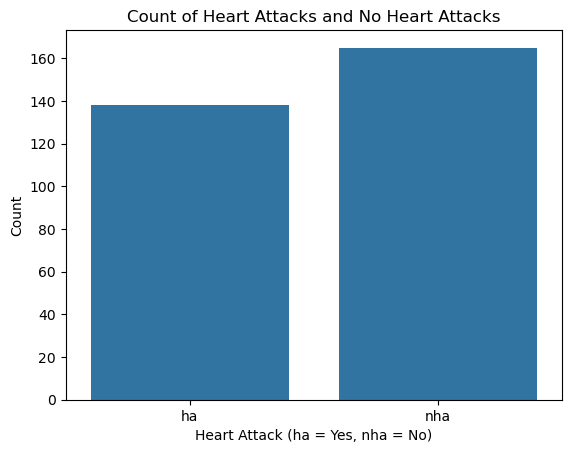

In [24]:
import seaborn as sns

ha = heart['output'].value_counts()
sns.barplot(x=ha.index, y=ha.values)

plt.xlabel("Heart Attack (ha = Yes, nha = No)")
plt.ylabel("Count")
plt.title("Count of Heart Attacks and No Heart Attacks")
plt.xticks([0, 1], ['ha', 'nha'])
plt.show()

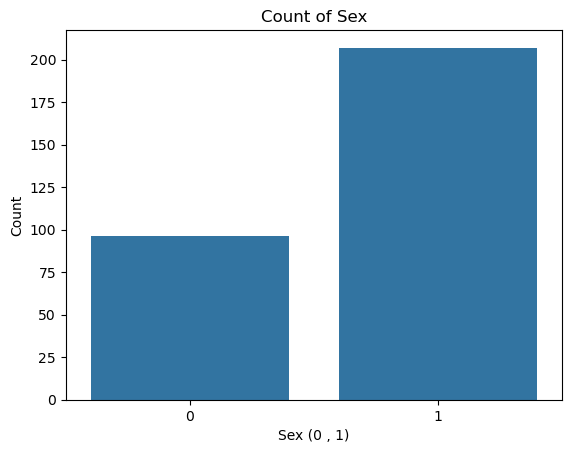

In [8]:
gender = heart['sex'].value_counts()

sns.barplot(x=gender.index, y=gender.values)

plt.xlabel("Sex (0 , 1)")
plt.ylabel("Count")
plt.title("Count of Sex")
plt.xticks([0, 1], ['0', '1'])
plt.show()

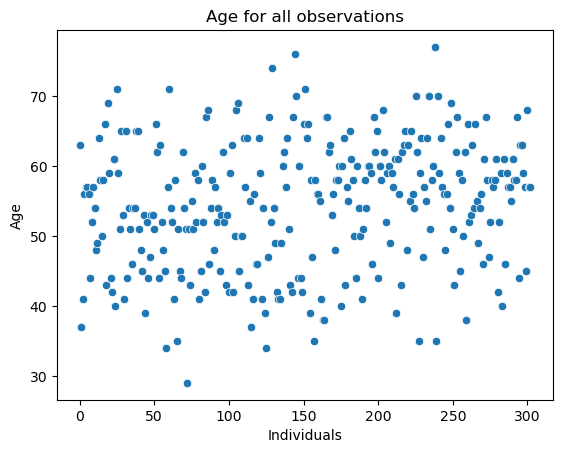

In [25]:
sns.scatterplot(x=heart.index, y=heart.age)

plt.ylabel("Age")
plt.xlabel("Individuals")
plt.title("Age for all observations")
plt.show()

/var/folders/d1/fvgg_p8d24339jy54g5334g00000gn/T/ipykernel_85046/1490029128.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart['age'].fillna(-1, inplace=True)


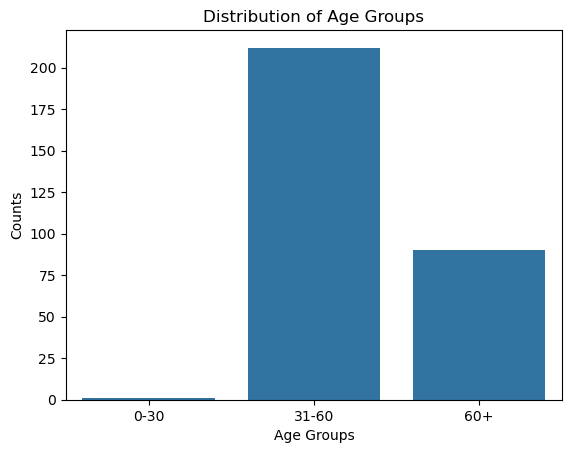

In [28]:
binsAge = [0, 30, 60, float('inf')]
labelsAge = [1, 2, 3]

# Categorize Age
heart['age'].fillna(-1, inplace=True)
heart['ageGroup'] = pd.cut(heart['age'], bins=binsAge, labels=labelsAge, right=False)

ageGroup = heart['ageGroup'].value_counts()

sns.barplot(x=ageGroup.index, y=ageGroup.values)

plt.xlabel("Age Groups")
plt.ylabel("Counts")
plt.title("Distribution of Age Groups")
plt.xticks([0, 1, 2], ['0-30', '31-60', '60+'])
plt.show()

<h1><b> Data Prep </b></h1>

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

x = heart.drop(columns=['output'])
y = heart.output

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [32]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 14)
(91, 14)
(212,)
(91,)


<h1><b> Model Prediction </b></h1>

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train_scaled, y_train)

y_pred = clf.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.80      0.73        41
           1       0.80      0.66      0.73        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.73      0.73        91



In [57]:
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train_scaled, y_train)

y_pred = clf.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [55]:
svm = SVC()
svm.fit(x_train_scaled, y_train)

y_pred = svm.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.81      0.88      0.85        50

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



<h3><b> Hypertuning </b> </h3>

In [75]:
param_grid = {
    'n_estimators': [50, 100, 150, 400],
    'max_depth': [None, 10, 20, 25],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 8, 12],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=clf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1,
                           )

grid_search.fit(x_train_scaled, y_train)
print("Optimal Params: ", grid_search.best_params_)
print("Best CV score: ", grid_search.best_score_)

Fitting 5 folds for each of 3072 candidates, totalling 15360 fits
Optimal Params:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
Best CV score:  0.8440753045404208


/Users/ericwang/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5120 fits failed out of a total of 15360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ericwang/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ericwang/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/ericwang/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/base.py",

In [76]:
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.824
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [71]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3],  
    'gamma': ['scale', 'auto', 0.01, 0.1], 
    'shrinking': [True, False],
    'probability': [True, False]
}

grid_search = GridSearchCV(estimator=svm,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1,
                           )

grid_search.fit(x_train_scaled, y_train)
print("Optimal Params: ", grid_search.best_params_)
print("Best CV score: ", grid_search.best_score_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Optimal Params:  {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'probability': True, 'shrinking': True}
Best CV score:  0.8395348837209301


In [72]:
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.835
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

